In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to extract datetime features
import datetime as dt

In [2]:
# Read in csv file
data = pd.read_csv("../Resources/imdb_movies.csv")


In [3]:
# Copying data to another variable to avoid any changes to the original data
df = data.copy()

In [4]:
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [6]:
# Convert date_x to datetime, and  budget_x and revenue into integers:
df['date_x'] = pd.to_datetime(df['date_x'])
df['budget_x'] = df['budget_x'].astype(int)
df['revenue'] = df['revenue'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   names       10178 non-null  object        
 1   date_x      10178 non-null  datetime64[ns]
 2   score       10178 non-null  float64       
 3   genre       10093 non-null  object        
 4   overview    10178 non-null  object        
 5   crew        10122 non-null  object        
 6   orig_title  10178 non-null  object        
 7   status      10178 non-null  object        
 8   orig_lang   10178 non-null  object        
 9   budget_x    10178 non-null  int64         
 10  revenue     10178 non-null  int64         
 11  country     10178 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 954.3+ KB


In [7]:
df

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000,271616668,AU
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000,2316794914,AU
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000,724459031,AU
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000,34200000,AU
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000,340941958,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,2016-12-28,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000,9353729,US
10174,Delta Force 2: The Colombian Connection,1990-08-24,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817,6698361,US
10175,The Russia House,1990-12-21,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000,22997992,US
10176,Darkman II: The Return of Durant,1995-07-11,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000,475661306,US


In [8]:
# Modified code from ChatGPT
# Identify duplicates (marking all duplicates as True, the first occurrence as False by default)
duplicates = df.duplicated(keep='first')

# Count duplicates
num_duplicates = duplicates.sum()

# Display the number of duplicates
print(f"Number of duplicate rows: {num_duplicates}")

# Review duplicate rows to understand what's being duplicated
print("Duplicate rows:")
df[duplicates]

# 

Number of duplicate rows: 0
Duplicate rows:


,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country


In [9]:
# Display column names
df.columns

Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   names       10178 non-null  object        
 1   date_x      10178 non-null  datetime64[ns]
 2   score       10178 non-null  float64       
 3   genre       10093 non-null  object        
 4   overview    10178 non-null  object        
 5   crew        10122 non-null  object        
 6   orig_title  10178 non-null  object        
 7   status      10178 non-null  object        
 8   orig_lang   10178 non-null  object        
 9   budget_x    10178 non-null  int64         
 10  revenue     10178 non-null  int64         
 11  country     10178 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 954.3+ KB


In [11]:
# Identify columns with null data and how many items. 
df.isna().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [12]:
# Display sample rows with null values for genre
df[df['genre'].isnull()].head(10)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
305,Housewife Sex Slaves: Hatano Yui,2015-01-09,0.0,NaN,We don't have an overview translated in Englis...,"Yui Hatano,",人妻性奴隷 波多野結衣,Released,Japanese,167540000,175269998,JP
1174,Beauty Rope Cosmetology,1983-12-02,10.0,NaN,Miki is the daughter of an affluent family. Sh...,"Miki Takakura, Miki, Maya Ito, Rena, Ren Osugi...",団鬼六 美女縄化粧,Released,Japanese,201940000,38157314,JP
1561,Reclaim,2022-07-29,20.0,NaN,She is a good woman living a fulfilling life. ...,NaN,Reclaim,Released,Chinese,12001040,38139010,US
1762,Ancient Chinese Whorehouse,1994-09-15,50.0,NaN,Madam Five and carpenter Kong work together ma...,"Kent Cheng, Kong, Yvonne Yung Hung, Miss Ng, S...",青樓十二房,Released,Cantonese,163600000,812667214,HK
1776,Porno document: Toruko tokkyû bin,1982-02-26,100.0,NaN,Pinku from 1982.,"Jun Miho, , Rumi Kagawa, , Miyuki Oka, , Kayok...",ポルノドキュメント トルコ特急便,Released,Japanese,201000000,1569323843,JP
2020,"Moses, Prince of Egypt",2000-01-01,56.0,NaN,"At birth, Moses, a Hebrew baby is abandoned on...",NaN,"Moses, Prince of Egypt",Released,English,80300000,321306715,AU
2144,My Beautiful Man ～eternal～,2023-04-07,0.0,NaN,We don't have an overview translated in Englis...,"Riku Hagiwara, , Yusei Yagi,",美しい彼～eternal～,Released,Japanese,167540000,175269998,JP
2267,Office Lady Rope Slave,1981-01-23,20.0,NaN,Two assistants to an S&M photographer decide t...,"Junko Mabuki, Kimiyo Ezaki, Asami Ogawa, Kikuk...",団鬼六 ＯＬ縄奴隷,Released,Japanese,12001040,38139010,JP
2317,Dream to be a Wife,2015-09-09,0.0,NaN,We don't have an overview translated in Englis...,"Ai Uehara,",欲望人妻：滴垂之蜜,Released,Chinese,167540000,175269998,CN
2431,Barbie,1977-01-01,20.0,NaN,Barbie comes home from shopping. She takes her...,NaN,Barbie,Released,No Language,12001040,38139010,US


In [13]:
# Display sample rows with null values for crew
df[df['crew'].isnull()].head(10)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
148,Orgasm Inc: The Story of OneTaste,2022-11-05,64.0,Documentary,A sexual wellness company gains fame and follo...,NaN,Orgasm Inc: The Story of OneTaste,Released,English,77400000,431611098,US
206,Legend of the Galactic Heroes: Die Neue These ...,2022-09-30,61.0,Animation,The story focuses on the exploits of rivals Re...,NaN,銀河英雄伝説 Die Neue These 策謀 1,Released,Japanese,138000000,337725907,JP
649,Cuento de Primavera-A Spring Tale,2022-12-20,81.0,"Drama, Fantasy, Mystery",We don't have an overview translated in Englis...,NaN,Cuento de Primavera-A Spring Tale,Released,"Spanish, Castilian",77600000,827017257,US
938,Cat Pack: A PAW Patrol Exclusive Event,2022-06-24,74.0,"Animation, Family",When Mayor Humdinger transforms his robot cat ...,NaN,Cat Pack: A PAW Patrol Exclusive Event,Released,English,92800000,609222681,US
1561,Reclaim,2022-07-29,20.0,NaN,She is a good woman living a fulfilling life. ...,NaN,Reclaim,Released,Chinese,12001040,38139010,US
1752,Avatar: Scene Deconstruction,2009-12-18,71.0,Documentary,The deconstruction of the Avatar scenes and sets,NaN,Avatar: Scene Deconstruction,Released,English,90100000,414551647,US
1828,Cyber Hell: Exposing an Internet Horror,2022-05-18,73.0,Documentary,"Anonymous and exploitative, a network of onlin...",NaN,사이버 지옥: n번방을 무너뜨려라,Released,Korean,53600000,682429959,KR
1881,Guinea Pig: Devil's Experiment,1985-09-04,47.0,Horror,A group of guys capture a young girl with the ...,NaN,ギニーピッグ 悪魔の実験,Released,Japanese,57800000,519287241,US
2020,"Moses, Prince of Egypt",2000-01-01,56.0,NaN,"At birth, Moses, a Hebrew baby is abandoned on...",NaN,"Moses, Prince of Egypt",Released,English,80300000,321306715,AU
2431,Barbie,1977-01-01,20.0,NaN,Barbie comes home from shopping. She takes her...,NaN,Barbie,Released,No Language,12001040,38139010,US


In [14]:
# Remove all null values
df.dropna(inplace=True)
# reset index
df.reset_index()
df

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000,271616668,AU
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000,2316794914,AU
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000,724459031,AU
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000,34200000,AU
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000,340941958,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,2016-12-28,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000,9353729,US
10174,Delta Force 2: The Colombian Connection,1990-08-24,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817,6698361,US
10175,The Russia House,1990-12-21,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000,22997992,US
10176,Darkman II: The Return of Durant,1995-07-11,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000,475661306,US


In [15]:
# Rename Columns:
df= df.rename(columns={
    'names':'Title', 
    'date_x':'Date',
    'score':'Rating', 
    'genre':'Genre', 
    'overview':'Overview', 
    'crew':'Actor', 
    'orig_title':'Orginal Title',
    'status':'Status', 
    'orig_lang':'Orginal Language', 
    'budget_x':'Budget', 
    'revenue':'Revenue', 
    'country':'Country'
}
)

In [16]:
df

,Title,Date,Rating,Genre,Overview,Actor,Orginal Title,Status,Orginal Language,Budget,Revenue,Country
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000,271616668,AU
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000,2316794914,AU
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000,724459031,AU
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000,34200000,AU
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000,340941958,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,2016-12-28,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000,9353729,US
10174,Delta Force 2: The Colombian Connection,1990-08-24,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817,6698361,US
10175,The Russia House,1990-12-21,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000,22997992,US
10176,Darkman II: The Return of Durant,1995-07-11,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000,475661306,US


In [17]:
# Split the 'Names' column into separate columns
# expand=True will expand the split strings into separate columns
df_split = df['Actor'].str.split(',', expand=True)

# Rename columns for clarity (optional)
df_split.columns = [f'Actor_{i+1}' for i in range(df_split.shape[1])]

# Display the result
df_split

,Actor_1,Actor_2,Actor_3,Actor_4,Actor_5,Actor_6,Actor_7,Actor_8,Actor_9,Actor_10,...,Actor_15,Actor_16,Actor_17,Actor_18,Actor_19,Actor_20,Actor_21,Actor_22,Actor_23,Actor_24
0,Michael B. Jordan,Adonis Creed,Tessa Thompson,Bianca Taylor,Jonathan Majors,Damien Anderson,Wood Harris,Tony 'Little Duke' Evers,Phylicia Rashād,Mary Anne Creed,...,José Benavidez Jr.,Felix Chavez,Selenis Leyva,Laura Chavez,None,None,None,None,None,None
1,Sam Worthington,Jake Sully,Zoe Saldaña,Neytiri,Sigourney Weaver,Kiri / Dr. Grace Augustine,Stephen Lang,Colonel Miles Quaritch,Kate Winslet,Ronal,...,CCH Pounder,Mo'at,Edie Falco,General Frances Ardmore,None,None,None,None,None,None
2,Chris Pratt,Mario (voice),Anya Taylor-Joy,Princess Peach (voice),Charlie Day,Luigi (voice),Jack Black,Bowser (voice),Keegan-Michael Key,Toad (voice),...,Kevin Michael Richardson,Kamek (voice),Sebastian Maniscalco,Spike (voice),None,None,None,None,None,None
3,Óscar Barberán,Thut (voice),Ana Esther Alborg,Nefer (voice),Luis Pérez Reina,Carnaby (voice),María Luisa Solá,Madre (voice),Jaume Solà,Sekhem (voice),...,Aleix Estadella,Dennis (voice),María Moscardó,Usi (voice),None,None,None,None,None,None
4,Skeet Ulrich,Roy Cameron,Anne Heche,Dr Quinn Brody,Daniel Diemer,William Brody,Jordan Kristine Seamón,Harper Hunter,Alec Baldwin,Zane Rogers,...,Johnny Wactor,Martin,Anjul Nigam,Ramesh,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,Annette Bening,Dorothea Fields,Lucas Jade Zumann,Jamie Fields,Greta Gerwig,Abbie Porter,Elle Fanning,Julie Miller,Billy Crudup,William,...,Vitaly Andrew LeBeau,Young Jamie,Olivia Hone,Julie's Sister,None,None,None,None,None,None
10174,Chuck Norris,Col. Scott McCoy,Billy Drago,Ramon Cotta,John P. Ryan,Gen. Taylor,Richard Jaeckel,DEA Agent John Page,Begonya Plaza,Quiquina Esquintla,...,Mark Margolis,Gen. Olmedo,Mateo Gómez,Ernesto Flores,None,None,None,None,None,None
10175,Sean Connery,Bartholomew 'Barley' Scott Blair,Michelle Pfeiffer,Katya Orlova,Roy Scheider,Russell,James Fox,Ned,John Mahoney,Brady,...,Ken Russell,Walter,David Threlfall,Wicklow,None,None,None,None,None,None
10176,Larry Drake,Robert G. Durant,Arnold Vosloo,Darkman / Peyton Westlake,Kim Delaney,Jill Randall,Renee O'Connor,Laurie Brinkman,Lawrence Dane,Dr. Alfred Hathaway,...,David Ferry,Eddie,Jack Langedijk,Rollo Latham,None,None,None,None,None,None


In [18]:
df

,Title,Date,Rating,Genre,Overview,Actor,Orginal Title,Status,Orginal Language,Budget,Revenue,Country
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000,271616668,AU
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000,2316794914,AU
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000,724459031,AU
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000,34200000,AU
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000,340941958,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,2016-12-28,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000,9353729,US
10174,Delta Force 2: The Colombian Connection,1990-08-24,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817,6698361,US
10175,The Russia House,1990-12-21,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000,22997992,US
10176,Darkman II: The Return of Durant,1995-07-11,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000,475661306,US


In [19]:
top_10_revenues = df.sort_values("Revenue",ascending=False)[0:10]
top_10_revenues

,Title,Date,Rating,Genre,Overview,Actor,Orginal Title,Status,Orginal Language,Budget,Revenue,Country
68,Avatar,2009-12-17,76.0,"Action, Adventure, Fantasy, Science Fiction","In the 22nd century, a paraplegic Marine is di...","Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar,Released,English,237000000,2923706026,AU
230,Avengers: Endgame,2019-04-24,83.0,"Adventure, Science Fiction, Action",After the devastating events of Avengers: Infi...,"Robert Downey Jr., Tony Stark / Iron Man, Chri...",Avengers: Endgame,Released,English,400000000,2794731755,AU
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000,2316794914,AU
309,Titanic,1997-12-18,79.0,"Drama, Romance",101-year-old Rose DeWitt Bukater tells the sto...,"Leonardo DiCaprio, Jack Dawson, Kate Winslet, ...",Titanic,Released,English,200000000,2222985568,AU
6670,Titanic,1953-04-11,66.0,"Drama, Romance","Unhappily married, Julia Sturges decides to go...","Clifton Webb, Richard Ward Sturges, Barbara St...",Titanic,Released,English,200000000,2222985568,US
4483,Louis Tomlinson: All of Those Voices,2023-03-22,91.0,"Documentary, Music",Ditching the typical glossy sheen of celebrity...,"Louis Tomlinson, Self, Oliver Wright, Louis’ P...",Louis Tomlinson: All of Those Voices,Released,English,178800000,2081794005,GB
943,Star Wars: The Force Awakens,2015-12-17,73.0,"Adventure, Action, Science Fiction, Fantasy",Thirty years after defeating the Galactic Empi...,"Harrison Ford, Han Solo, Mark Hamill, Luke Sky...",Star Wars: The Force Awakens,Released,English,245000000,2068223624,AU
104,Avengers: Infinity War,2018-04-25,83.0,"Adventure, Action, Science Fiction",As the Avengers and their allies have continue...,"Robert Downey Jr., Tony Stark / Iron Man, Chri...",Avengers: Infinity War,Released,English,300000000,2048359754,AU
76,Spider-Man: No Way Home,2021-12-16,80.0,"Action, Adventure, Science Fiction",Peter Parker is unmasked and no longer able to...,"Tom Holland, Peter Parker / Spider-Man, Zenday...",Spider-Man: No Way Home,Released,English,200000000,1910048245,AU
2156,BTS: Permission to Dance on Stage - LA,2022-09-08,92.0,"Music, Documentary","Purple colors the city of Los Angeles, as BTS ...","Kim Nam-joon, Self, Kim Seok-jin, Self, Min Yo...",BTS: PERMISSION TO DANCE 온 스테이지 – LA,Released,Korean,215600000,1748017438,KR


In [20]:
df['Status'].value_counts()

Status
 Released           10007
 Post Production       30
 In Production         15
Name: count, dtype: int64

In [21]:
df['Orginal Language'].value_counts()

Orginal Language
 English                                7381
 Japanese                                675
 Spanish, Castilian                      388
 Korean                                  384
 French                                  282
 Chinese                                 144
 Italian                                 142
 Cantonese                               141
 German                                   89
 Russian                                  65
 Tagalog                                  42
 Portuguese                               35
 Thai                                     33
 Norwegian                                29
 Hindi                                    26
 Polish                                   26
 Danish                                   23
 Swedish                                  22
 Turkish                                  21
 Dutch, Flemish                           21
 Indonesian                               11
 Telugu                               

In [22]:
df['Country'].value_counts()

Country
AU    4880
US    2716
JP     502
KR     358
FR     219
GB     172
ES     151
IT     123
HK     120
MX     102
CN      86
DE      85
CA      67
RU      52
PH      42
AR      40
BR      38
IN      35
TH      29
DK      24
PL      22
TR      19
NO      16
NL      15
CO      14
TW      12
IE      11
ID      11
CL       9
SE       9
PE       7
FI       6
BE       6
GR       6
SU       5
UA       4
SG       4
CH       4
ZA       3
AT       2
MY       2
UY       2
SK       2
HU       2
CZ       2
VN       2
PR       2
GT       2
IS       2
DO       1
BO       1
IL       1
PY       1
MU       1
XC       1
PT       1
IR       1
Name: count, dtype: int64

In [23]:
top_10_rating = df.sort_values("Rating",ascending=False)[0:10]
top_10_rating

,Title,Date,Rating,Genre,Overview,Actor,Orginal Title,Status,Orginal Language,Budget,Revenue,Country
4887,Pretty Young Sister 4,2021-01-15,100.0,"Drama, Romance",Jeong-woo who is tired of instant food and liv...,"Ha Yeon, , Shin Yeon-ho, , Kang Seo, , Yoon Da...",예쁜 여동생 4,Released,Korean,201000000,1569323843,KR
934,Female Boss Hooker,2020-08-31,100.0,"Drama, Romance",Ji-cheol is a job seeker who only plays and ea...,"Ye Seul, , Lee Sul-ah-I, , Min Do-yoon, , Jo Y...",여사장 후리꾼,Released,Korean,201000000,1569323843,KR
8232,Housekeeper,2020-03-26,100.0,Romance,"Min-woo, the consulate general of the overseas...","Ahn So-hee, , Min Do-yoon, , Kang Min-woo, , H...",예쁜식모,Released,Korean,201000000,1569323843,KR
10046,Simulant,2023-06-02,100.0,"Science Fiction, Thriller",Faye attempts to replace her newly deceased hu...,"Robbie Amell, Evan, Jordana Brewster, Faye, Si...",Hello Stranger,Released,English,201000000,1569323843,US
6433,"Furin, hentai, monmon chômon",2019-10-25,100.0,Drama,"Minoru is dead. However, he was conscious for ...","Tomoka Takase, Maya Iizuka, Riona Suzushiro, S...",不倫、変態、悶々弔問,Released,Japanese,201000000,1569323843,JP
443,El asistente,2023-03-01,100.0,Comedy,We don't have an overview translated in Englis...,"Rodrigo Noya, Miguel, Luis Cao, Jimmy, Florenc...",El asistente,Released,"Spanish, Castilian",201000000,1569323843,AR
277,Orgasm Lecture 2,2020-02-20,100.0,Drama,"Yuner, Liu Ren, and Zhou Xian are college girl...","Min Do-yoon, , Park Soo-bin-III, , Hong Sae-he...",오르가즘 특강 2,Released,Korean,201000000,1569323843,KR
5404,The Chosen: Season 3 - Episodes 1 & 2,2022-11-18,100.0,"Drama, History",After Jesus completes a sermon that turns the ...,"Jonathan Roumie, Jesus, Noah James, Andrew, Pa...",The Chosen: Season 3 - Episodes 1 & 2,Released,English,201000000,1569323843,US
7815,Rebound,2023-04-05,98.0,Drama,Joong-Ang High School was once renowned for it...,"Ahn Jae-hong, Kang Yang-hyun, Lee Sin-young, C...",리바운드,Released,Korean,45000000,17492014,KR
4755,Directing Annabelle: Creation,2017-08-07,93.0,Documentary,Director David F. Sandberg takes you through t...,"David F. Sandberg, Himself, Talitha Bateman, H...",Directing Annabelle: Creation,Released,English,227800000,1644265184,US


**Multivariate Analysis: Ratings**

Ratings : Country  
Ratings : Budget   
Ratings : Revenue   
Ratings : Genre  
Ratings : Actor     

In [24]:
df['Rating'].describe()

count    10052.00000
mean        63.82700
std         12.78271
min          0.00000
25%         59.00000
50%         65.00000
75%         71.00000
max        100.00000
Name: Rating, dtype: float64

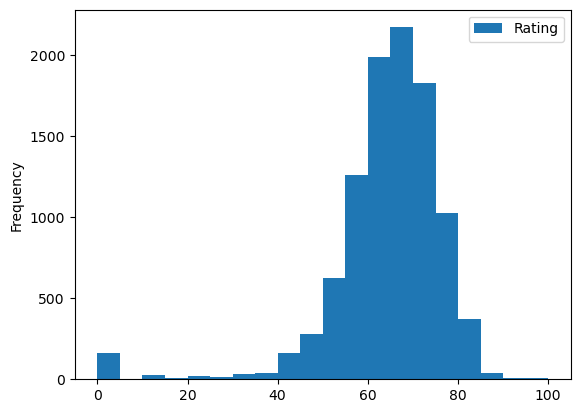

In [25]:
df.plot(y='Rating', kind='hist', bins=20)
plt.show()

**Ratings : Country**

In [26]:
# Describe 
df.groupby('Country')['Rating'].describe().head(10)


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
AR,40.0,65.800000,11.449331,40.0,58.75,65.5,71.00,100.0
AT,2.0,67.000000,8.485281,61.0,64.00,67.0,70.00,73.0
AU,4880.0,66.706762,8.452772,0.0,62.00,67.0,72.00,87.0
BE,6.0,64.833333,11.856081,42.0,64.50,68.5,71.00,75.0
BO,1.0,52.000000,NaN,52.0,52.00,52.0,52.00,52.0
BR,38.0,55.763158,18.752202,0.0,55.00,60.0,65.00,80.0
CA,67.0,58.761194,13.965422,0.0,55.00,60.0,67.00,83.0
CH,4.0,46.000000,31.822424,0.0,39.75,55.5,61.75,73.0
CL,9.0,59.666667,6.082763,53.0,56.00,57.0,62.00,73.0


In [27]:
# Average rating by country
country_avg_score = df.groupby('Country')['Rating'].mean().sort_values(ascending=False)
country_avg_score.head(10)

Country
SU    79.800000
XC    76.000000
PR    76.000000
CZ    72.500000
DO    72.000000
PY    71.000000
MX    70.205882
MU    70.000000
GT    68.000000
DK    67.333333
Name: Rating, dtype: float64

In [28]:
# Get the list of top 10 countries by count
top_10_countries = df['Country'].value_counts().head(10)
top_10_countries

Country
AU    4880
US    2716
JP     502
KR     358
FR     219
GB     172
ES     151
IT     123
HK     120
MX     102
Name: count, dtype: int64

In [29]:
# Get the list of top 10 countries by count
top_10_countries = df['Country'].value_counts().head(10).index.tolist()
top_10_countries

['AU', 'US', 'JP', 'KR', 'FR', 'GB', 'ES', 'IT', 'HK', 'MX']

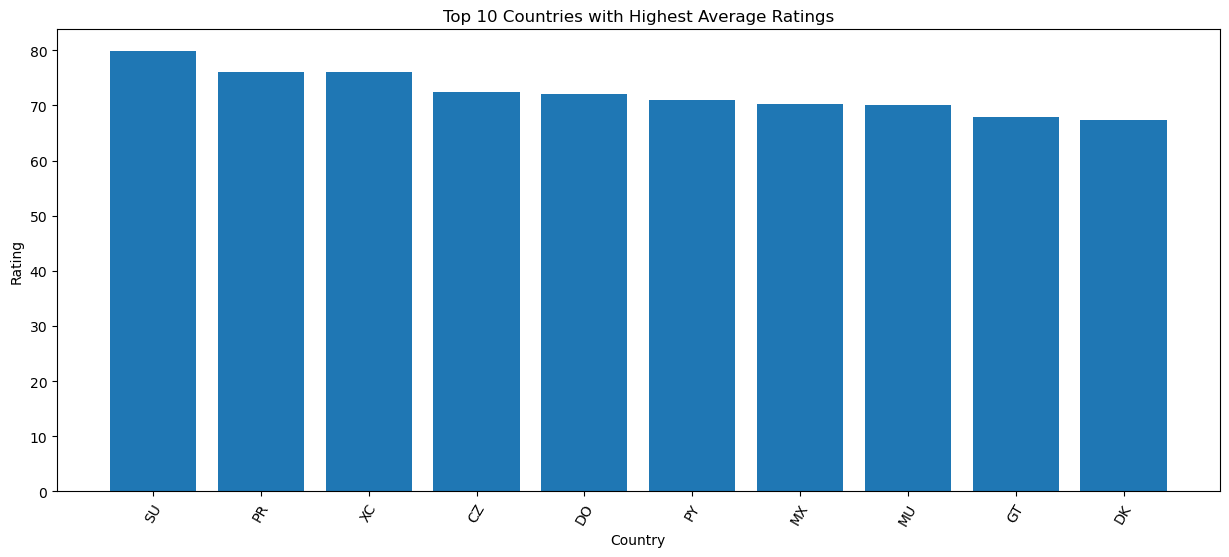

In [34]:
rating_by_country = df.loc[:, ['Country', 'Rating']]
rating_by_country = rating_by_country.groupby('Country').mean()
top_10_countries = rating_by_country.nlargest(10, 'Rating')

# Create a bar plot
plt.figure(figsize=(15,6))
plt.bar(top_10_countries.index, top_10_countries['Rating'])
plt.title('Top 10 Countries with Highest Average Ratings')

# Set the x-axis labels
plt.xticks(rotation=60)

# Label the axes
plt.xlabel('Country')
plt.ylabel('Rating')

# Show the plot
plt.show()

**Ratings : Budget**

The correlation between ratings and budget is -0.21


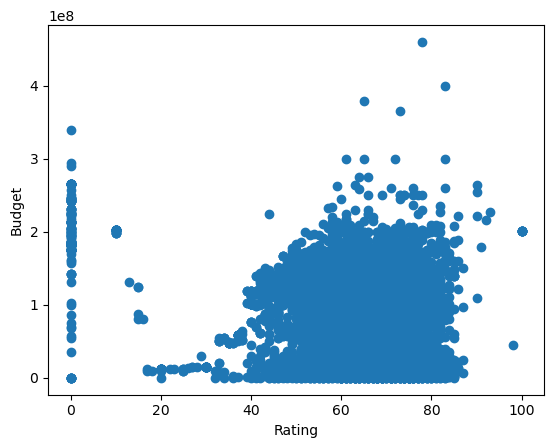

In [35]:
import scipy.stats as st

# Ratings : Budget  df.iloc[:,9]
rating = df.iloc[:,2]
budget = df.iloc[:,9]
correlation = st.pearsonr(rating,budget)

plt.scatter(df.iloc[:,2],df.iloc[:,9])
plt.xlabel('Rating')
plt.ylabel('Budget')

print(f"The correlation between ratings and budget is {round(correlation[0],2)}")
plt.show()

# Questions to team: 
# 1. How do we want to handle movies with 0 budget? 
# 2. How do I convert the budget so that it displays in millions?  

In [36]:
print(budget.sort_values(ascending=False))



1        460000000
230      400000000
298      379000000
329      365000000
117      340000000
           ...    
9631             7
4600             6
4919             5
10087            1
2805             1
Name: Budget, Length: 10052, dtype: int64


**Ratings : Revenue**

The correlation between ratings and revenue is 0.09


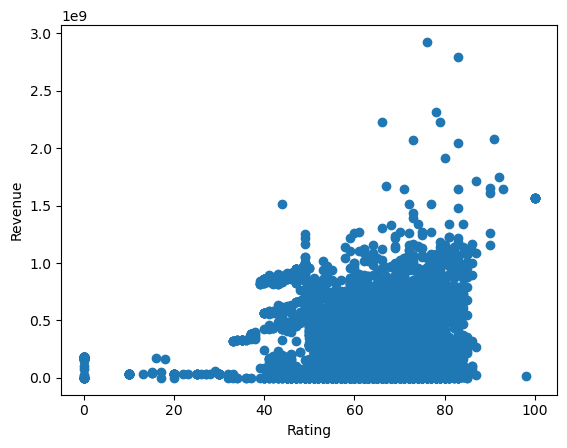

In [37]:
# Ratings : Revenue     df.iloc[:,10]

rating = df.iloc[:,2]
revenue = df.iloc[:,10]
correlation = st.pearsonr(rating,revenue)

plt.scatter(df.iloc[:,2],df.iloc[:,10])
plt.xlabel('Rating')
plt.ylabel('Revenue')

print(f"The correlation between ratings and revenue is {round(correlation[0],2)}")
plt.show()

**Ratings : Genre**

In [38]:
top_10_genre = df["Genre"].value_counts().index.tolist()[0:9]
top_10_genre

['Drama',
 'Comedy',
 'Drama,\xa0Romance',
 'Horror',
 'Horror,\xa0Thriller',
 'Comedy,\xa0Romance',
 'Documentary',
 'Action,\xa0Thriller',
 'Comedy,\xa0Drama']

In [39]:
# Create a new column Primary Genre by selecting the first genre from the 'genre' column
df['Primary Genre'] = df['Genre'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else None)

# Display the first few rows to confirm the new column creation
df.head(10)


,Title,Date,Rating,Genre,Overview,Actor,Orginal Title,Status,Orginal Language,Budget,Revenue,Country,Primary Genre
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000,271616668,AU,Drama
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000,2316794914,AU,Science Fiction
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000,724459031,AU,Animation
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000,34200000,AU,Animation
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000,340941958,US,Action
5,Cocaine Bear,2023-02-23,66.0,"Thriller, Comedy, Crime","Inspired by a true story, an oddball group of ...","Keri Russell, Sari, Alden Ehrenreich, Eddie, O...",Cocaine Bear,Released,English,35000000,80000000,AU,Thriller
6,John Wick: Chapter 4,2023-03-23,80.0,"Action, Thriller, Crime","With the price on his head ever increasing, Jo...","Keanu Reeves, John Wick, Donnie Yen, Caine, Bi...",John Wick: Chapter 4,Released,English,100000000,351349364,AU,Action
7,Puss in Boots: The Last Wish,2022-12-26,83.0,"Animation, Family, Fantasy, Adventure, Comedy",Puss in Boots discovers that his passion for a...,"Antonio Banderas, Puss in Boots (voice), Salma...",Puss in Boots: The Last Wish,Released,English,90000000,483480577,AU,Animation
8,Attack on Titan,2022-09-30,59.0,"Action, Science Fiction","As viable water is depleted on Earth, a missio...","Paul Bianchi, Computer (voice), Erin Coker, Al...",Attack on Titan,Released,English,71000000,254946484,US,Action
9,The Park,2023-03-02,58.0,"Action, Drama, Horror, Science Fiction, Thriller",A dystopian coming-of-age movie focused on thr...,"Chloe Guidry, Ines, Nhedrick Jabier, Bui, Carm...",The Park,Released,English,119200000,488962491,US,Action


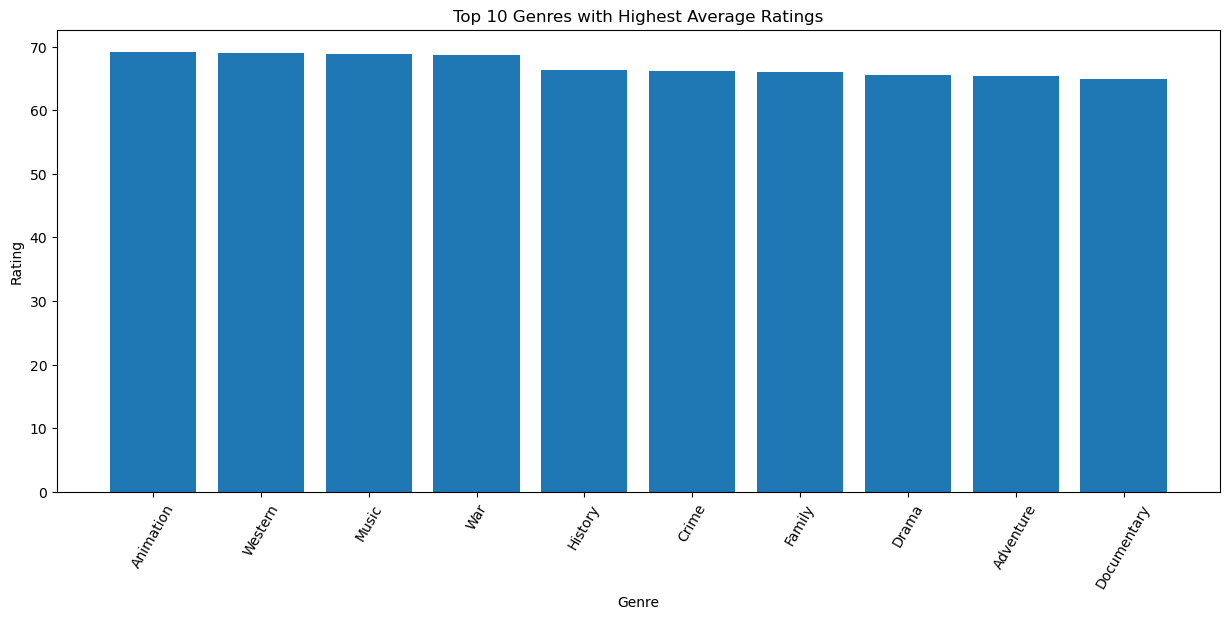

In [42]:
rating_by_genre = df.loc[:, ['Primary Genre', 'Rating']]
rating_by_genre = rating_by_genre.groupby('Primary Genre').mean()
top_10_genres = rating_by_genre.nlargest(10, 'Rating')

# Create a bar plot
plt.figure(figsize=(15,6))
plt.bar(top_10_genres.index, top_10_genres['Rating'])
plt.title('Top 10 Genres with Highest Average Ratings')

# Set the x-axis labels
plt.xticks(rotation=60)

# Label the axes
plt.xlabel('Genre')
plt.ylabel('Rating')

# Show the plot
plt.show()

**Ratings : Actors**

In [ ]:
top_10_actors = df["Actors"].value_counts().index.tolist()[0:9]
top_10_actors